In [1]:
import numpy as np
from numpy.random import normal as norm
from matplotlib import pyplot as plt
import random
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
# for better simulations (be careful: 200 times longer)
# Nsim = 100
# k_range = [i / 100 for i in range(1, 101)]

# fixed biases [d-color, d-shape]
# -0.5 => green are perceived of having higher quality
# 1.5 => stars are perceived of having lower quality
d = [-0.5, 1.5]

# there are equal number of stars and circles i.e. N
# out of which f * N are green circles and (1 - f) * N are orange circles
# out of which f * N are orange stars and (1 - f) * N are green stars
# [f, (1 - f)]
f = [0.2, 0.8]

In [3]:
# Genetare biased distribution
# real quality q0 is from N(0, 1)
# d - discrimination against 1s
# f - fraction of indviduals having property having hidden (second) property
# N - number of people

def generate(d = [0.5, 0.5], f = [0.5, 0.5], N = [2000, 2000]):
    # size of groups
    s = [(1 - f[0]) * N[0], f[0] * N[0], (1 - f[1]) * N[1], f[1] * N[1]]
    s = [int(x) for x in s]

    # vector of properties
    a = [(0,0)] * s[0] + [(0,1)] * s[1] + [(1,0)] * s[2] + [(1,1)] * s[3]

    m = 0
    st = 1
    q0 = norm(m, st, len(a))

    # creating bias
    bias = [0 for i in range(s[0])] + [-d[1] * st for i in range(s[1])] + [-d[0] * st for i in range(s[2])] + [-d[1] * st - d[0] * st for i in range(s[3])]
    q = q0 + bias

    # shuffling the results
    rnd = [x for x in range(len(a))]
    random.shuffle(rnd)

    q = [q[i] for i in rnd]
    a = [a[i] for i in rnd]    
    q0 = [q0[i] for i in rnd]

    # return vectors of properties, perceived qualities and real qualities
    return a, q, q0

In [4]:
# return individuals with top percieved qualities
def getTop(a, q, top = 0.1):    
    top = int(len(q) * top)
    ordered = [i for i in sorted(zip(q, a), reverse = True)]
    return ordered[:top]
         
# return individuals top individuals after debiasing
def getTopDebiased(a, q, top = 0.1):
    # Debiasing is always on the visible (first) attribute 
    # Allocate proportional quotas
    quota_1 = int(len([x for x in a if x[0] == 1]) * top)
    quota_0 = int(len([x for x in a if x[0] == 0]) * top)
    ordered = [i for i in sorted(zip(q, a), reverse = True)]
    return [x for x in ordered if x[1][0] == 0][:quota_0] + [x for x in ordered if x[1][0] == 1][:quota_1]

In [5]:
# Compute chances to be in top k% for aggregated groups before and after debiasing
# d => fixed biases []
# f => number of elements
def get_aggregated(d, f, Nsim, k_range):
    results = {'original': {0: [], 1: []},
               'debiased': {0: [], 1: []}}


    # shapes(invisible) => 0: circle; 1: stars
    # colors(visible) => 0: orange; 1: green
    groups = [0, 1]

    for k in k_range:
        simulations = {'original': {0: [], 1: []},
                       'debiased': {0: [], 1: []}}

        for i in tqdm(range(0, Nsim), desc='Simulations for Top {}'.format(k*100)):
            # properties, perceived qualities and real qualities
            a, q, q0 = generate(d, f)

            for group in groups:

                # compute expected chances to be in top
                exp = len([x for x in a if x[0] == group]) / len(q)

                for approach in ['original', 'debiased']:

                    if approach == 'original':
                       top = getTop(a, q, k)
                    else:
                       top = getTopDebiased(a, q, k)

                    # compute real chances to be in top
                    real = len([x for x in top if x[1][0] == group]) / len(top)

                    simulations[approach][group].append((real - exp) / exp)

        for group in [0, 1]:
            for approach in ['original', 'debiased']:
                results[approach][group].append(np.mean(simulations[approach][group]))
    return results

In [6]:
def plot_aggregated(results):
    colors = ['green', 'orange']
    styles = {'original': '-', 'debiased': '--'}

    for approach in ['original', 'debiased']:
        for group in [0, 1]:
            plt.plot(k_range, results[approach][group], color = colors[group], ls = styles[approach])

    plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
    plt.xlabel('top k')
    plt.ylabel('representation bias')

In [7]:
# for quick results
Nsim = 5

# to fetch top k% candidates
k_range = [i / 100 for i in range(1, 101, 5)]

Simulations for Top 1.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 6.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 11.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 16.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 21.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 26.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 31.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 36.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 41.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 46.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 51.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 56.00000000000001:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 61.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 66.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 71.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 76.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 81.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 86.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 91.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 96.0:   0%|          | 0/5 [00:00<?, ?it/s]

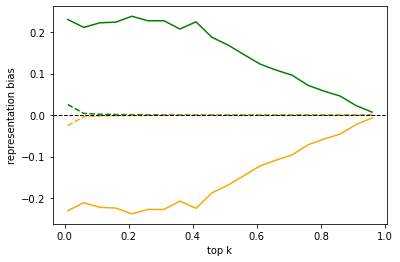

In [8]:
results_agg = get_aggregated(d, f, Nsim, k_range)
plot_aggregated(results_agg)

In [9]:
# Compute chances to be in top k% for disaggregated groups before and after debiasing
def get_disaggregated(d, f, Nsim, k_range):
    groups = [(0,0),(0,1),(1,0),(1,1)]
    
    results = {'original': {g:[] for g in groups},
               'debiased': {g:[] for g in groups}}

    for k in k_range:    
        simulations = {'original': {g:[] for g in groups},
                       'debiased': {g:[] for g in groups}}
        
        for i in tqdm(range(0, Nsim), desc='Simulations for Top {}'.format(k*100)):
            a, q, q0 = generate(d, f)
            
            for g in groups:
                # compute expected chances to be in top
                exp = len([x for x in a if x == g]) / len(q)
                
                for approach in ['original', 'debiased']:
                    if approach == 'original':
                       top = getTop(a, q, k)
                    else:
                       top = getTopDebiased(a, q, k)
                    # compute real chances to be in top
                    real = len([x for x in top if x[1] == g]) / len(top)
                    simulations[approach][g].append((real - exp) / exp)

        for g in groups:
            for approach in ['original', 'debiased']:
                results[approach][g].append(np.mean(simulations[approach][g]))
    return results

def plot_disaggregated(results):
    groups = [(0,0),(0,1),(1,0),(1,1)]
    fill = {'original': 'full', 'debiased': 'none'}
    colors = ['orange', 'green']
    shapes = ['o', '*']
    #ms = [6, 9, 6, 9]

    for g in groups:
        for approach in ['original', 'debiased']:            
            plt.plot(k_range, results[approach][g], shapes[g[1]], color = colors[g[0]], lw = 2, fillstyle = fill[approach])

    plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
    plt.fill_between(k_range, results['debiased'][(0,1)], results['original'][(0,1)], color='orange', alpha=.25)

    plt.xlabel('top k')
    plt.ylabel('representation bias')

Simulations for Top 1.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 6.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 11.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 16.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 21.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 26.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 31.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 36.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 41.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 46.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 51.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 56.00000000000001:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 61.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 66.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 71.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 76.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 81.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 86.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 91.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 96.0:   0%|          | 0/5 [00:00<?, ?it/s]

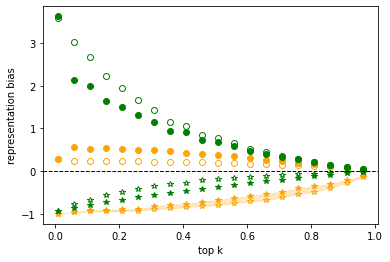

In [10]:
results = get_disaggregated(d, f, Nsim, k_range)
plot_disaggregated(results)

In [11]:
np.save('results_synth_main.npy', {'agg': results_agg, 'diss_agg': results})

In [16]:
read_dictionary = np.load('results_synth_main.npy', allow_pickle='TRUE').item()
read_dictionary

{'agg': {'original': {0: [0.2304615384615384,
    0.21141255230125516,
    0.22247334851936212,
    0.22410704225352104,
    0.23830774731823584,
    0.22741203079884492,
    0.2274573849878933,
    0.207481236970118,
    0.22483099450884675,
    0.18752251223491018,
    0.16890828837665514,
    0.14576083072800344,
    0.12296642066420656,
    0.10847612732095482,
    0.09616829869672408,
    0.07166357354392884,
    0.05771636307502311,
    0.0458565280604826,
    0.02277254740313268,
    0.00698965876530339],
   1: [-0.230576826874976,
    -0.21151831145698372,
    -0.22258464083978208,
    -0.22421915182943586,
    -0.2384269607986354,
    -0.22752579369569292,
    -0.22757117057318008,
    -0.2075850294848606,
    -0.22494346624196787,
    -0.18761632039510787,
    -0.16899278476903978,
    -0.1458337476018045,
    -0.12302793463152246,
    -0.10853039251721355,
    -0.09621640690017433,
    -0.07169942325555671,
    -0.057745235692869615,
    -0.045879467794379944,
    -0.0227839